10. Bilateral filtering:

Images found in folder: ['im01.png', 'im01small.png', 'im02.png', 'im02small.png', 'im03.png', 'im03small.png', 'taylor.jpg', 'taylor_small.jpg', 'taylor_very_small.jpg']
Successfully loaded image: ./images_for_zooming/a1q5images\taylor.jpg (shape: (560, 1000))


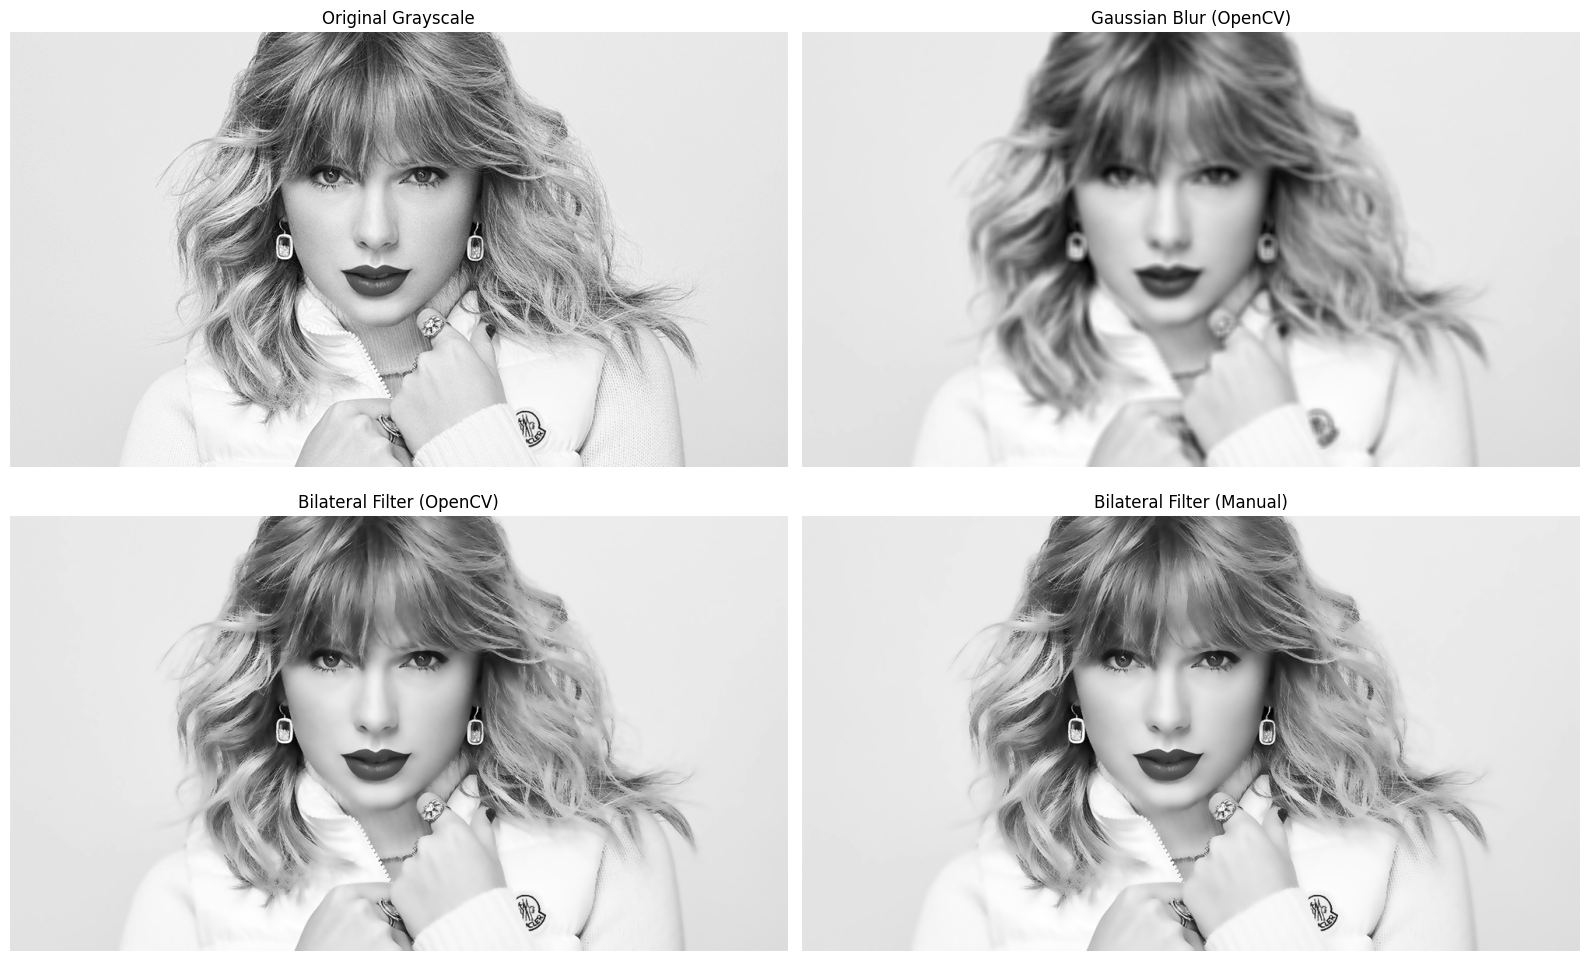

In [17]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import os

def bilateral_filter_manual(img, diameter, sigma_s, sigma_r):
   
    if len(img.shape) != 2:
        raise ValueError("Input image must be grayscale (2D)")
    
    img = img.astype(np.float32)
    h, w = img.shape
    radius = diameter // 2
    filtered = np.zeros_like(img)
    
    spatial_weights = np.zeros((diameter, diameter))
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            dist = math.sqrt(i**2 + j**2)
            spatial_weights[i + radius, j + radius] = math.exp(-dist**2 / (2 * sigma_s**2))
    
    spatial_weights /= np.sum(spatial_weights)
    
    for y in range(h):
        for x in range(w):
            center_intensity = img[y, x]
            total_weight = 0.0
            weighted_sum = 0.0
            
            for dy in range(-radius, radius + 1):
                for dx in range(-radius, radius + 1):
                    ny, nx = y + dy, x + dx
                    if 0 <= ny < h and 0 <= nx < w:
                        neighbor_intensity = img[ny, nx]
                        
                        intensity_diff = center_intensity - neighbor_intensity
                        range_weight = math.exp(-intensity_diff**2 / (2 * sigma_r**2))
                        
                        weight = spatial_weights[dy + radius, dx + radius] * range_weight
                        
                        weighted_sum += neighbor_intensity * weight
                        total_weight += weight
            
            if total_weight > 0:
                filtered[y, x] = weighted_sum / total_weight
            else:
                filtered[y, x] = center_intensity  
    
    return filtered.astype(np.uint8)

image_folder = "./images_for_zooming/a1q5images"

print("Images found in folder:", os.listdir(image_folder))

image_path = os.path.join(image_folder, "taylor.jpg")  

img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img_gray is None:
    raise FileNotFoundError(f"Image not found at: {image_path}\n"
                            f"Make sure the file exists in: {image_folder}\n"
                            f"Available files: {os.listdir(image_folder)}")

print(f"Successfully loaded image: {image_path} (shape: {img_gray.shape})")

diameter = 9        
sigma_s = 5.0      
sigma_r = 25.0      

gaussian_cv = cv2.GaussianBlur(img_gray, (diameter, diameter), sigmaX=sigma_s)

bilateral_cv = cv2.bilateralFilter(img_gray, d=diameter, sigmaColor=sigma_r, sigmaSpace=sigma_s)

bilateral_manual = bilateral_filter_manual(img_gray, diameter, sigma_s, sigma_r)

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Gaussian Blur (OpenCV)")
plt.imshow(gaussian_cv, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Bilateral Filter (OpenCV)")
plt.imshow(bilateral_cv, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Bilateral Filter (Manual)")
plt.imshow(bilateral_manual, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
